## Observations and Insights 

Final Observations
1. The sex of the mice in the study were almost split equally with 49.6% being female and 50.4% being male.
2. The r^2 (square of the sample correlation coefficient) value found when analysing average tumor vs weight for Capomulin drug regimen indicates that the regression predictions fit the data strongly (r^2 = 0.8344)
3. Infubinol had one observation that was an outlier 
4. Tumor volume for randomly selected mouse decreased over the timeperiod
5. Mean and median tumor volumes for each drug are very close indicating the tumor volume has little distribution skewness  

In [23]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import os
import scipy.stats as st
import numpy as np
from sklearn import datasets

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
mousestudy = pd.merge(mouse_metadata, study_results,how = 'outer', on = ["Mouse ID"])

# save merged mousestudy
#mousestudy_df.to_csv("mousedata.csv", index=False)

# Display the data table for preview
mousestudy


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [24]:
# Checking the number of mice.
mousecounts = mousestudy.nunique()["Mouse ID"]
mousecounts

249

In [25]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicates = mousestudy[mousestudy.duplicated(["Mouse ID","Timepoint"])]
duplicates.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [26]:
# Optional: Get ALL the data for the duplicate mouse ID. 
duplicated_mouse = mousestudy.loc[mousestudy["Mouse ID"] == "g989"]
duplicated_mouse

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [27]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
# Mous ID g989 has a few duplicate rows. Cleaned DF has the Mouse ID removed
mousestudy_cleaned = mousestudy[mousestudy["Mouse ID"] !='g989']
mousestudy_cleaned


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [28]:
# Checking the number of mice in the clean DataFrame.
mousecounts_cleaned = mousestudy_cleaned.nunique()["Mouse ID"]
mousecounts_cleaned
#Total mice in study were 248 after removing/cleaning data

248

## Summary Statistics

In [29]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
group_drug = mousestudy_cleaned.groupby(["Drug Regimen"])

mean_tumorvolume = group_drug["Tumor Volume (mm3)"].mean() 
median_tumorvolume = group_drug["Tumor Volume (mm3)"].median()
variance_tumorvolume = group_drug["Tumor Volume (mm3)"].var()
STD_tumorvolume = group_drug["Tumor Volume (mm3)"].std()
SEM_tumorvolume = group_drug["Tumor Volume (mm3)"].sem()

drug_summary = pd.DataFrame({"Mean": mean_tumorvolume,
                            "Median": median_tumorvolume,
                            "Variance": variance_tumorvolume,
                            "STD": STD_tumorvolume,
                            "SEM": SEM_tumorvolume}).round(3)
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
drug_summary

,Mean,Median,Variance,STD,SEM
Drug Regimen,,,,,
Capomulin,40.676,41.558,24.948,4.995,0.329
Ceftamin,52.591,51.776,39.290,6.268,0.470
Infubinol,52.885,51.821,43.129,6.567,0.492
Ketapril,55.236,53.699,68.554,8.280,0.604
Naftisol,54.332,52.509,66.173,8.135,0.596
Placebo,54.034,52.289,61.168,7.821,0.581
Propriva,52.321,50.446,43.852,6.622,0.544
Ramicane,40.217,40.673,23.487,4.846,0.321
Stelasyn,54.233,52.432,59.451,7.710,0.573


In [30]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# This method produces everything in a single groupby function
tumor_statistics = mousestudy_cleaned.groupby("Drug Regimen").agg({"Tumor Volume (mm3)": ["mean","median", "var", "std", "sem"]}).round(3)
tumor_statistics

Tumor Volume (mm3)                              
                           mean  median     var    std    sem
Drug Regimen                                                 
Capomulin                40.676  41.558  24.948  4.995  0.329
Ceftamin                 52.591  51.776  39.290  6.268  0.470
Infubinol                52.885  51.821  43.129  6.567  0.492
Ketapril                 55.236  53.699  68.554  8.280  0.604
Naftisol                 54.332  52.509  66.173  8.135  0.596
Placebo                  54.034  52.289  61.168  7.821  0.581
Propriva                 52.321  50.446  43.852  6.622  0.544
Ramicane                 40.217  40.673  23.487  4.846  0.321
Stelasyn                 54.233  52.432  59.451  7.710  0.573
Zoniferol                53.237  51.818  48.533  6.967  0.516

In [31]:
# Easy way to describe the data by Tumor Volume and check results
group_drug["Tumor Volume (mm3)"].describe().round(3)

,count,mean,std,min,25%,50%,75%,max
Drug Regimen,,,,,,,,
Capomulin,230.0,40.676,4.995,23.344,37.686,41.558,45.000,48.158
Ceftamin,178.0,52.591,6.268,45.000,47.208,51.776,56.801,68.923
Infubinol,178.0,52.885,6.567,36.321,47.312,51.821,57.314,72.227
Ketapril,188.0,55.236,8.280,45.000,48.233,53.699,60.871,78.567
Naftisol,186.0,54.332,8.135,45.000,47.286,52.509,59.963,76.669
Placebo,181.0,54.034,7.821,45.000,47.459,52.289,59.917,73.213
Propriva,148.0,52.321,6.622,45.000,46.894,50.446,56.492,72.455
Ramicane,228.0,40.217,4.846,22.050,36.675,40.673,45.000,47.623
Stelasyn,181.0,54.233,7.710,45.000,48.047,52.432,58.719,75.124


## Bar and Pie Charts

<AxesSubplot:title={'center':'Treatment Data Point Counts'}, xlabel='Drug Regimen', ylabel='No. of Mice Observations'>

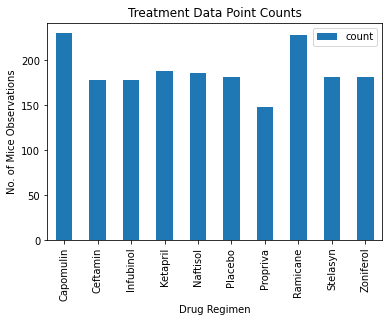

In [83]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pandas. 
count_drug = group_drug["Tumor Volume (mm3)"].describe()["count"]
count_drug_df = pd.DataFrame(count_drug)

pandas_plot = count_drug_df.plot(kind="bar", legend=True)
pandas_plot.set_title("Treatment Data Point Counts")
pandas_plot.set_xlabel("Drug Regimen")
pandas_plot.set_ylabel("No. of Mice Observations")
pandas_plot

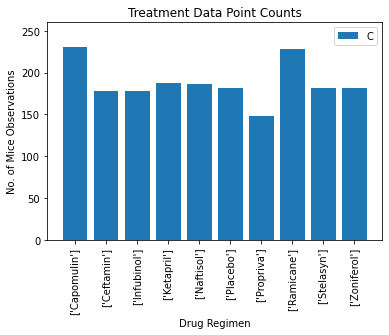

In [77]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pyplot.
drug_grouped = mousestudy_cleaned.groupby("Drug Regimen")
x_values = drug_grouped["Drug Regimen"].unique().astype(str)
y_values = drug_grouped["Drug Regimen"].value_counts()

plt.bar(x_values, y_values)
plt.legend("Count", loc = "upper right")
plt.title("Treatment Data Point Counts")
plt.xlabel("Drug Regimen")
plt.ylim(0,260)
plt.xticks(rotation=90)
plt.ylabel("No. of Mice Observations")
plt.show()

Text(0.5, 1.0, 'Male vs Female Trials')

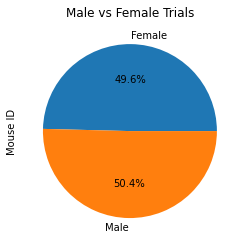

In [70]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
malevsfemale_grouped = mousestudy_cleaned.groupby("Sex").nunique()
malevsfemale = malevsfemale_grouped["Mouse ID"].plot.pie(autopct = '%1.1f%%')
malevsfemale.set_title("Male vs Female Trials")

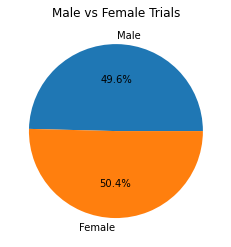

In [71]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
plt.pie(malevsfemale_grouped["Mouse ID"], autopct = '%1.1f%%', labels = ["Male","Female"])
plt.title("Male vs Female Trials")
plt.show()



## Quartiles, Outliers and Boxplots

In [36]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
# Start by getting the last (greatest) timepoint for each mouse
max_timepoint_df = pd.DataFrame(mousestudy_cleaned.groupby('Mouse ID')['Timepoint'].max())
max_timepoint_df = max_timepoint_df.rename(columns={"Timepoint":"Max Timepoint"})
max_timepoint_df

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
max_timepoint_merged = pd.merge(mousestudy_cleaned, max_timepoint_df, on="Mouse ID")
max_timepoint_merged = max_timepoint_merged.loc[max_timepoint_merged["Timepoint"] == max_timepoint_merged["Max Timepoint"]]
max_timepoint_merged

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites,Max Timepoint
9,k403,Ramicane,Male,21,16,45,22.050126,1,45
19,s185,Capomulin,Female,3,17,45,23.343598,1,45
29,x401,Capomulin,Female,16,15,45,28.484033,0,45
39,m601,Capomulin,Male,22,17,45,28.430964,1,45
49,g791,Ramicane,Male,11,16,45,29.128472,1,45
...,...,...,...,...,...,...,...,...,...
1846,z314,Stelasyn,Female,21,28,5,45.934712,0,5
1849,z435,Propriva,Female,12,26,10,48.710661,0,10
1859,z581,Infubinol,Female,24,25,45,62.754451,3,45
1869,z795,Naftisol,Female,13,29,45,65.741070,3,45


In [84]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_data = []

# Locate the rows which contain mice on each drug and get the tumor volumes
print("The Final tumor volume analysed for drug regimen Capomulin, Ramicane, Infubinol, and Ceftamin")
print("-------------------------------------------------------------------")

for treatment in treatments:
    temp_filtered_data = max_timepoint_merged.loc[max_timepoint_merged["Drug Regimen"] == treatment]
    final_volume = temp_filtered_data["Tumor Volume (mm3)"]
    tumor_vol_data.append(final_volume)
    
    #print(final_volume)
    #print(tumor_vol_data)
    
# Calculate the IQR and quantitatively determine if there are any potential outliers. 
    quartiles = final_volume.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq - lowerq
    print(f"{treatment}")
    print(f"The 1st quartile for {treatment} final tumor volume is {lowerq.round(2)}")
    print(f"The 3rd quartile for {treatment} final tumor volume is {upperq.round(2)}")
    print(f"IQR for {treatment} final tumor volume: {iqr.round(2)}")
    
# Determine outliers using upper and lower bounds
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    
    
    
    print(f"Lower Bound for {treatment} final tumor volume: {lower_bound.round(2)}")
    print(f"Upper Bound for {treatment} final tumor volume: {upper_bound.round(2)}")
   
    # https://stackoverflow.com/questions/24775648/element-wise-logical-or-in-pandas
    outliers = temp_filtered_data.loc[(temp_filtered_data["Tumor Volume (mm3)"] > upper_bound) | 
                                      (temp_filtered_data["Tumor Volume (mm3)"] < lower_bound)
                                     ]
    
    outliers = outliers["Tumor Volume (mm3)"].round(2)
    outliers_count = outliers.count()
    
# Print outliers   
    if len(outliers)>0:         
        print(f"There are {outliers_count} outliers. Outliers for drug regimen {treatment} are{outliers.to_string(index=False)}")
    else:
        print("There are no outliers for this drug regimen final tumor volume")

    print("-------------------------------------------------------------------")
    

The Final tumor volume analysed for drug regimen Capomulin, Ramicane, Infubinol, and Ceftamin
-------------------------------------------------------------------
Capomulin
The 1st quartile for Capomulin final tumor volume is 32.38
The 3rd quartile for Capomulin final tumor volume is 40.16
IQR for Capomulin final tumor volume: 7.78
Lower Bound for Capomulin final tumor volume: 20.7
Upper Bound for Capomulin final tumor volume: 51.83
There are no outliers for this drug regimen final tumor volume
-------------------------------------------------------------------
Ramicane
The 1st quartile for Ramicane final tumor volume is 31.56
The 3rd quartile for Ramicane final tumor volume is 40.66
IQR for Ramicane final tumor volume: 9.1
Lower Bound for Ramicane final tumor volume: 17.91
Upper Bound for Ramicane final tumor volume: 54.31
There are no outliers for this drug regimen final tumor volume
-------------------------------------------------------------------
Infubinol
The 1st quartile for Inf

In [38]:
type(outliers_count)

numpy.int32

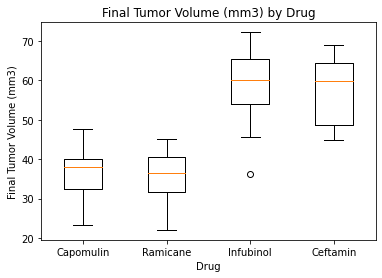

In [39]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
plt.boxplot(tumor_vol_data)
plt.title("Final Tumor Volume (mm3) by Drug")
plt.xticks([1,2,3,4], treatments) 
plt.ylabel("Final Tumor Volume (mm3)")
plt.xlabel("Drug")
plt.show()
    

## Line and Scatter Plots

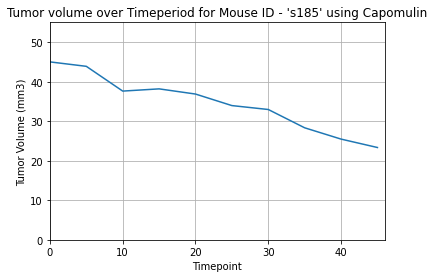

In [40]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
capomulin_data = mousestudy_cleaned.loc[(mousestudy_cleaned["Drug Regimen"]) == "Capomulin"]
capomulin_data

# Randomly picked Mouse ID - S185. Get all data
capomulin_mouse_df = capomulin_data.loc[(capomulin_data["Mouse ID"]) == "s185"]

x_values = capomulin_mouse_df["Timepoint"]
y_values = capomulin_mouse_df["Tumor Volume (mm3)"]

plt.plot(x_values,y_values)
plt.title("Tumor volume over Timeperiod for Mouse ID - 's185' using Capomulin")
plt.xlabel("Timepoint")
plt.ylabel("Tumor Volume (mm3)")
plt.ylim(0,55)
plt.xlim(0,46)
plt.grid()

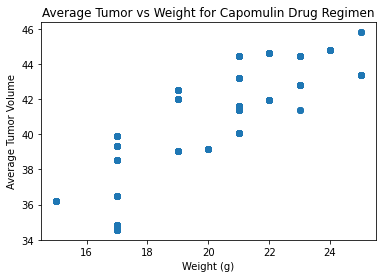

In [41]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
capomulin_avg_tumor = pd.DataFrame(capomulin_data.groupby("Mouse ID")["Tumor Volume (mm3)"].mean())
capomulin_avg_tumor = capomulin_avg_tumor.rename(columns={"Tumor Volume (mm3)": "Average Tumor Volume"})
capomulin_avg_tumor.head()

capomulin_df  = pd.merge(capomulin_data, capomulin_avg_tumor, on = "Mouse ID")
capomulin_df.head()

x_values = capomulin_df["Weight (g)"]
y_values = capomulin_df["Average Tumor Volume"]

#Ins Fits and Regression
plt.scatter(x_values, y_values)
plt.title("Average Tumor vs Weight for Capomulin Drug Regimen")
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume")
plt.show()

## Correlation and Regression

Correlation is between weight and average tumor volume is (r^2) = 0.8344


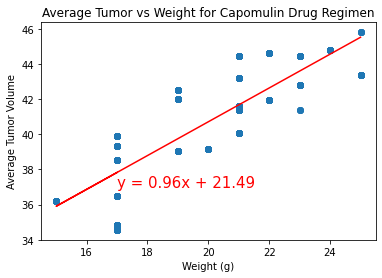

In [42]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)

regress_values = x_values * slope + intercept

correlartion_calculation = st.pearsonr(capomulin_df["Weight (g)"], capomulin_df["Average Tumor Volume"])

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

print(f"Correlation is between weight and average tumor volume is (r^2) = {round(correlartion_calculation[0],4)}")

plt.scatter(x_values, y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq, (17,37), fontsize=15, color="Red")
plt.title("Average Tumor vs Weight for Capomulin Drug Regimen")
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume")
plt.show()